# Contando Palavras
Neste capítulo iremos começar a interagir com os textos no nível da linguagem, por meio das ferramentas do Processamento de Linguagem Natural (PLN). Vamos progredir gradualmente nossa representação da linguagem a partir da morfologia, passando pela sintaxe e chegando à semântica. 

Nesta etapa, faremos uso de biliotecas especializadas em PLN como o [NLTK](https://www.nltk.org/) e a [Spacy](https://spacy.io/). 

In [1]:
import nltk
import spacy
from collections import Counter
import pandas as pd
from sqlalchemy import create_engine
%pylab inline

2022-11-16 13:15:09.415332: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 13:15:09.610243: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 13:15:10.381776: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-16 13:15:10.381870: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

Populating the interactive namespace from numpy and matplotlib


Bibliotecas de PLN requerem o carregamento de modelos de liguagem para funcionar de maneira apropriada: para este capitulo iremos carregar os modelos específicos da lingua portuguesa. Para isso precisamos executar comandos no terminal do sistema operacional:

In [2]:
!python3 -m spacy download pt_core_news_sm

2022-11-16 13:15:14.811630: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 13:15:15.807366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-16 13:15:15.807472: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-16 13:15:15.807485: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-11-16 13:15:17.697350: W tensorflow/stream_executor/platfo

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Para contar as palavras de um texto, é preciso primeiro separá-las uma a uma. A este processo dá-se o nome de tokenização, e é típicamente fácil de fazer mal-feito e difícil de fazer bem-feito.

Primeiramente precisaremos carregar os verbetes com a função que criamos no capítulo 1.

In [4]:
import glob, os
caminho = "../dhbb/text/*.text"
arquivos  = glob.glob(caminho)

def tabula_verbete(n=None):
    """
    Carrega todos os verbetes disponíveis, ou os primeiros n.
    n:  número de verbetes a tabular
    """
    if n is None:
        n = len(arquivos)
    linhas = []
    for a in arquivos[:n]:
        with open (a, 'r', encoding='utf8') as f:
            verbete = f.read()
        cabeçalho = verbete.split('---')[1]
        campos = {l.split(':')[0].strip() :l.split(':')[1].strip() for l in cabeçalho.split('\n')[:4] if l}
        campos['arquivo'] = os.path.split(a)[1]
        campos['cargos'] = pd.np.nan if 'cargos:' not in cabeçalho else cabeçalho.split('cargos:')[1]
        campos['corpo'] = verbete.split('---')[2]
        linhas.append(campos)
    tabela = pd.DataFrame(data = linhas, columns=['arquivo','title', 'natureza', 'sexo', 'cargos', 'corpo'])
    return tabela

## Tokenização com o nltk

In [5]:
tabela = tabula_verbete()

In [6]:
eng = create_engine("sqlite:///minha_tabela.sqlite")
#dhbb = pd.read_sql_table('resultados')
biograficos = pd.read_sql_query('select * from resultados where natureza="biográfico"', con=eng)
biograficos.head()

,index,arquivo,title,natureza,sexo,cargos,corpo
0,0,1.text,"COELHO, Machado",biográfico,m,\n - dep. fed. DF 1927-1929 \n - dep. fed. DF ...,\n\n«José Machado Coelho de Castro» nasceu em ...
1,1,10.text,"ABÍLIO, Armando",biográfico,m,\n - dep. fed. PB 1995-1999\n - dep. fed. PB ...,\n\n«Armando Abílio Vieira» nasceu em Itaporan...
2,2,100.text,"ALEIXO, Pedro",biográfico,m,\n - const. 1934\n - dep. fed. MG 1935-1937\n ...,"\n\n«Pedro Aleixo» nasceu em São Caetano, dist..."
3,3,1000.text,"CAMPOS, Eduardo",biográfico,m,\n - dep. fed. PE 1995\n - dep. fed. PE 1998-...,\n\n«Eduardo Henrique Accioly Campos» nasceu e...
4,4,1001.text,"CAMPOS, Eleazar Soares",biográfico,m,\n - magistrado\n - interv. MA 1945-1946\n,\n\n«Eleazar Soares Campos» nasceu em São Luís...


## Tokenização com o NLTK

In [13]:
palavras = nltk.word_tokenize(biograficos.corpo[0])
palavras[:10]

['«',
 'José',
 'Machado',
 'Coelho',
 'de',
 'Castro',
 '»',
 'nasceu',
 'em',
 'Lorena']

Uma vez "tokenizado" o texto podemos contar as palavras muito simplesmente usando a função `Counter`do Python

In [14]:
c = Counter(palavras)
c.most_common(n=10)

[('de', 22),
 (',', 20),
 ('em', 16),
 ('.', 14),
 ('a', 10),
 ('no', 8),
 ('e', 7),
 ('da', 6),
 ('(', 5),
 (')', 5)]

Outra maneira de fazer isso seria usando o NLTK. Com a vantagem de ainda podermos visualizar graficamente.

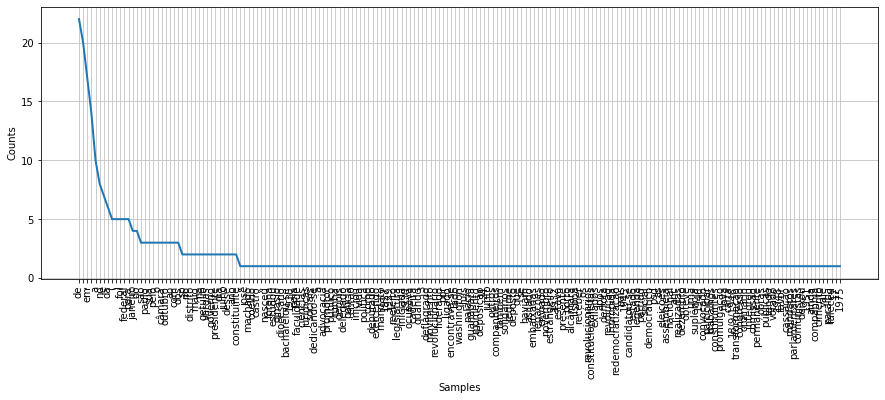

In [15]:
figure(figsize=(15,5))
fd = nltk.FreqDist([p.lower() for p in palavras])
fd.plot();

In [16]:
print("Numero de tokens:", len(palavras))
print("Tamanho do Vocabulário:", len(set([p.lower() for p in palavras])))

Numero de tokens: 341
Tamanho do Vocabulário: 185


Como vemos no exemplo acima, as palavras mais frequentes não muito informativas. Muitas vezes pode ser útil removê-las da análise. Linguistas costumams chamar este tipo de palavras de **stop-words**. Alem disso, vamos tambem remover as pontuaçoes. 

In [17]:
sw = nltk.corpus.stopwords.words('portuguese')
from string import punctuation
print(punctuation)
sw[:10]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

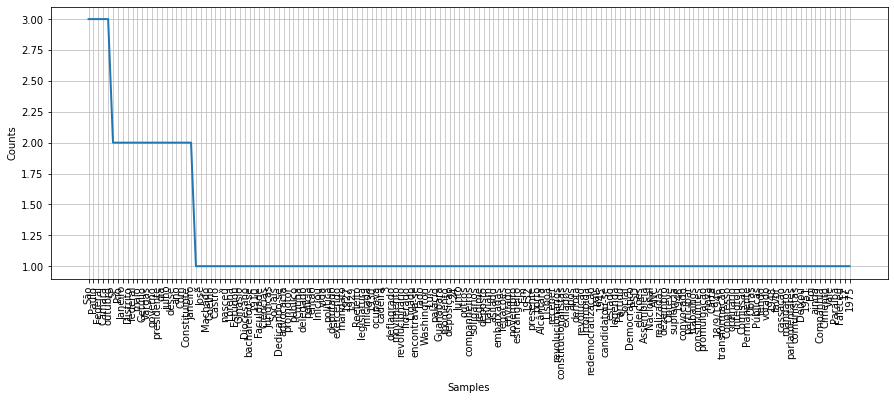

In [18]:
figure(figsize=(15,5))
fd = nltk.FreqDist([p for p in palavras if p not in sw+list(punctuation)])
fd.plot();

# Analizando coleções de textos
Acima analizamos o conteúdo de apenas um verbete, mas seria bem mais relevante podermos fazer a análise em uma coleção de verbetes. Para isso aprenderemos a criar um objeto `TextCollection` que como o nome diz, representa uma coleção de texto, mas que nos permite a realização de análises a nível de coleção.

In [19]:
tc = nltk.TextCollection([nltk.word_tokenize(c) for c in biograficos.corpo])

In [20]:
nltk.FreqDist(tc)

FreqDist({',': 587463, 'de': 517135, '.': 259247, 'do': 226381, 'a': 214979, 'e': 192479, 'da': 181854, 'em': 153158, 'o': 148578, ')': 87927, ...})

In [21]:
tc.concordance('filho', width=150)

Displaying 25 of 10181 matches:
io Vieira » nasceu em Itaporanga ( PB ) no dia 29 de dezembro de 1944 , filho de Argemiro Abílio de Sousa e de Luísa Bronzeado Vieira . Em 1962 ingre
arlos Zoghbi , foi acusado de emprestar um apartamento funcional para o filho e de abrir empresas em nome de uma ex-babá de 83 anos , para intermedia
 de 2009 , a « Folha de S. Paulo » denunciou que Luís Fernando Zoghbi , filho de João Carlos Zoghbi , teve passagens emitidas para Madri , em 2008 , 
distrito do município de Mariana ( MG ) , no dia 1º de agosto de 1901 , filho do comerciante José Caetano Aleixo e de Úrsula Martins Aleixo . Fez seu
ipação dos generais Humberto de Alencar Castelo Branco , Olímpio Mourão Filho e Osvaldo Cordeiro de Farias e dos líderes udenistas Pedro Aleixo - que
rique Accioly Campos » nasceu em Recife , no dia 10 de agosto de 1965 , filho de Maximiano Accioly Campos e de Ana Lúcia Arraes de Alencar . Seu avô 
 % dos votos , contra os 34,64 % obtidos pelo então governador Mendo

In [22]:
linhas = tc.concordance_list('filho',width=150)
linhas[0]

ConcordanceLine(left=['Cimento', 'Vale', 'do', 'Paraíba', '.', 'Faleceu', 'no', 'Rio', 'de', 'Janeiro', 'no', 'dia', '17', 'de', 'maio', 'de', '1975', '.', '«', 'Armando', 'Abílio', 'Vieira', '»', 'nasceu', 'em', 'Itaporanga', '(', 'PB', ')', 'no', 'dia', '29', 'de', 'dezembro', 'de', '1944', ','], query='filho', right=['de', 'Argemiro', 'Abílio', 'de', 'Sousa', 'e', 'de', 'Luísa', 'Bronzeado', 'Vieira', '.', 'Em', '1962', 'ingressou', ',', 'em', 'Recife', ',', 'na', 'Faculdade', 'de', 'Ciências', 'Médicas', 'da', 'Universidade', 'Federal', 'de', 'Pernambuco', ',', 'pela', 'qual', 'se', 'graduou', 'em', '1968', '.'], offset=360, left_print='io Vieira » nasceu em Itaporanga ( PB ) no dia 29 de dezembro de 1944 ,', right_print='de Argemiro Abílio de Sousa e de Luísa Bronzeado Vieira . Em 1962 ingre', line='io Vieira » nasceu em Itaporanga ( PB ) no dia 29 de dezembro de 1944 , filho de Argemiro Abílio de Sousa e de Luísa Bronzeado Vieira . Em 1962 ingre')

In [23]:
print(*linhas[0].right)

de Argemiro Abílio de Sousa e de Luísa Bronzeado Vieira . Em 1962 ingressou , em Recife , na Faculdade de Ciências Médicas da Universidade Federal de Pernambuco , pela qual se graduou em 1968 .


## Exercício
Utilizando a ferramenta de concordance, procure extrair a filiação dos verbetados, escrevendo uma função que percorra todas as ocorrências da palavra "filho", separando aquelas com sentido de indicação de filiação.

In [24]:
def parse_progenitores(linha):
    '''
    A partir de uma linha do DHBB contendo nomes de pai e mãe, extrai os nomes e os retorna
    '''
    right = linha.right[1:]
    try:
        pos_virg = right.index(',')
    except ValueError:
        pos_virg = 100
    try:
        pos_pt = right.index('.')
    except ValueError:
        pos_pt = 100
    fim = min(pos_virg, pos_pt)
    pais = right[:fim]
    if 'e' in pais:
        pai = " ".join(pais[:pais.index('e')])
        mae = " ".join([p for p in pais[pais.index('e'):] if p not in [',', 'de', 'e']])
    else:
        pai = " ".join(pais)
        mae = "desconhecida."
    return pai, mae

def encontra_pais(tc):
    linhas = tc.concordance_list('filho',width=180, lines=50000) + tc.concordance_list('filha',width=180, lines=50000)
    print("Processando {} linhas".format(len(linhas)))
    i = 0
    for linha in linhas:
        if linha.right[0] not in ['de', 'da', 'do']:
            continue
        pai, mae = parse_progenitores(linha)
        i += 1
        print("Pai:",pai, '\n', "Mãe:", mae)
    print("Encontramos progenitores em {} linhas".format(i))
encontra_pais(tc)

Processando 11028 linhas
Pai: Argemiro Abílio de Sousa 
 Mãe: Luísa Bronzeado Vieira
Pai: João Carlos Zoghbi 
 Mãe: desconhecida.
Pai: comerciante José Caetano Aleixo 
 Mãe: Úrsula Martins Aleixo
Pai: Maximiano Accioly Campos 
 Mãe: Ana Lúcia Arraes Alencar
Pai: Francisco Gonçalves Campos 
 Mãe: Adelina Gonçalves Campos
Pai: comerciante José Justino Campos 
 Mãe: Noemi França Campos
Pai: Antônio Machado de Campos 
 Mãe: Ana Cândida da Silva
Pai: magistrado Jacinto Álvares da Silva Campos 
 Mãe: Azejúlia Sousa Silva
Pai: Manuel Soares Campos 
 Mãe: Irene Gomes Campos
Pai: Manuel Campos 
 Mãe: Alaíde Dantas Campos
Pai: Albino da Silva Campos 
 Mãe: Adalgisa da Costa Campos
Pai: Júlio Domingos Campos 
 Mãe: desconhecida.
Pai: José Dias Pinto Aleixo 
 Mãe: Esaltina Maria Paiva Aleixo
Pai: Júlio Domingos Campos 
 Mãe: desconhecida.
Pai: João Ferraz de Campos 
 Mãe: Edi Pereira Ferraz Campos
Pai: José Wilson Siqueira Campos 
 Mãe: Aureni Siqueira Campos
Pai: Júlio Domingos de Campos 
 Mãe: A

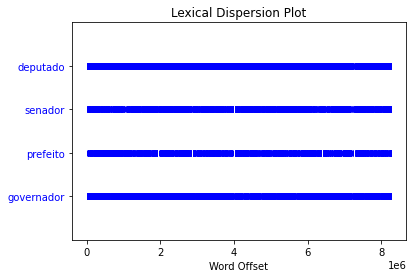

In [25]:
tc.dispersion_plot(['deputado', 'senador', 'prefeito', 'governador'])

# Separando frases
Além de quebrar os textos em seus tokens constituintes, podemos também dividi-los por frases, o que pode ser mais convenientes para certas análises. Para isso utilizamos a função `sent_tokenize` do nltk.

In [26]:
nltk.tokenize.sent_tokenize(biograficos.corpo[0])

['\n\n«José Machado Coelho de Castro» nasceu em Lorena (SP).',
 'Estudou no Ginásio Diocesano de São Paulo e bacharelou-se em 1910 pela\nFaculdade de Ciências Jurídicas e Sociais.',
 'Dedicando-se à advocacia, foi\npromotor público em Cunha (SP) e depois delegado de polícia no Rio de\nJaneiro, então Distrito Federal.',
 'Iniciou sua vida política como deputado federal pelo Distrito Federal,\nexercendo o mandato de 1927 a 1929.',
 'Reeleito para a legislatura iniciada\nem maio de 1930, ocupava sua cadeira na Câmara quando, em 3 de outubro,\nfoi deflagrado o movimento revolucionário liderado por Getúlio Vargas.',
 'Ligado ao governo federal, encontrava-se ao lado do presidente\nWashington Luís, no palácio Guanabara, no momento de sua deposição no\ndia 24 de outubro.',
 'Junto com outros companheiros também solidários ao\nregime deposto e que se haviam asilado em embaixadas e legações, foi\nenviado em novembro para o estrangeiro.',
 'Em outubro de 1932, estava\npresente no porto de Alcânt

# Busca textual
Realizar uma busca textual em uma coleção de textos é muito mais eficiente do que simplesmente realizar operações sobre coleções de strings. Neste capítulo iremos examinar como "indexar" o DHBB, usando um simples indexador/buscador chamado [whoosh](https://whoosh.readthedocs.io). 

In [28]:
from whoosh import index 
import os
from whoosh.fields import *
from IPython.core.display import display, HTML

In [29]:
schema = Schema(title=TEXT(stored=True), sexo=ID(stored=True), caminho=ID(stored=True), corpo=TEXT(stored=True))

In [39]:
if not os.path.exists('indexdir'):
    os.mkdir('indexdir')
    ix = index.create_in("indexdir", schema)
else:
    ix = index.open_dir('indexdir')

In [40]:
writer = ix.writer()

In [41]:
for v in biograficos.itertuples():
    if pd.isnull(v.sexo):
        writer.add_document(title=v.title,sexo='na', caminho=v.arquivo,corpo=v.corpo)
    else:
        writer.add_document(title=v.title,sexo=v.sexo, caminho=v.arquivo,corpo=v.corpo)
writer.commit()

In [42]:
from whoosh.qparser import QueryParser
from whoosh import qparser

In [43]:
def busca(consulta):
    qp = QueryParser("corpo", ix.schema)
    qp.add_plugin(qparser.EveryPlugin())
    query = qp.parse(consulta)
    
    with ix.searcher() as searcher:
        results = [(dict(hit),hit.highlights("corpo")) for hit in searcher.search(query, limit=10)]
    return results
    

In [44]:
resultados = busca('assassin*')


In [45]:
print('Resultados:', len(resultados))
for res in resultados[:10]:
    print(res[0]['title'])
    display(HTML(res[1]))
   # encontra_pais(nltk.Text(nltk.tokenize.wordpunct_tokenize(res[0]['corpo'])))

Resultados: 10
PASCOAL, Hildebrando


RIPPOL, Valdemar


CUNHA, Francisco Flores da


MENDES, Chico


CUNHA NETO, Augusto


VAZ, Rubens


FURTADO, Heitor Alencar


VANNUCHI, Paulo


CUNHA, Ceci


BARROS, Manuel Gomes de
